<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#Modules" data-toc-modified-id="Modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modules</a></span></li></ul></li><li><span><a href="#The-Data" data-toc-modified-id="The-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Data</a></span></li><li><span><a href="#Basic-Counts" data-toc-modified-id="Basic-Counts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic Counts</a></span></li><li><span><a href="#Combine-with-groupby()" data-toc-modified-id="Combine-with-groupby()-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Combine with <code>groupby()</code></a></span></li><li><span><a href="#normalize" data-toc-modified-id="normalize-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><code>normalize</code></a></span></li><li><span><a href="#Binning" data-toc-modified-id="Binning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Binning</a></span></li><li><span><a href="#Combine-with-nlargest()" data-toc-modified-id="Combine-with-nlargest()-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Combine with <code>nlargest()</code></a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Import

## Modules

In [1]:
%load_ext autoreload
%autoreload 2

#Science and Data
import pandas as pd
import numpy as np

# Infrastructure
from pathlib import Path
import sys
import os

#Plotting Tools
import seaborn as sns
import matplotlib.pyplot as plt

Set up options

In [2]:
# Matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'font.size': 18})

Set up paths

In [3]:
PROJECT_ROOT = !git rev-parse --show-toplevel
PROJECT_ROOT = Path(PROJECT_ROOT[0])

# The Data

In the examples shown in this article, I will be using a data set taken from the Kaggle website. It is designed for a machine learning classification task and contains information about medical appointments and a target variable which denotes whether or not the patient showed up to their appointment.

It can be downloaded [here](https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show).

In the code below I have imported the data and the libraries that I will be using throughout the article.

In [4]:
data = pd.read_csv(str(PROJECT_ROOT / "notebooks" / "gist.pandas.value_counts" / "data" / "raw.csv"))
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Basic Counts

The `value_counts()` function can be used in the following way to get a count of unique values for one column in the data set. The code below gives a count of each value in the `Gender` column.

In [5]:
data['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

To sort values in ascending or descending order we can use the `sort` argument. In the code below I have added `sort=True` to sort the `Age` column in descending order.

In [6]:
data['Age'].value_counts(sort=True)

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

# Combine with `groupby()`

The `value_counts` function can be combined with other Pandas functions for richer analysis techniques. One example is to combine with the `groupby()` function. In the below example I am counting values in the Gender column and applying `groupby()` to further understand the number of no-shows in each group.

In [7]:
data['No-show'].groupby(data['Gender']).value_counts(sort=True)

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

# `normalize`

In the above example displaying the absolute values does not easily enable us to understand the differences between the two groups. A better solution would be to show the relative frequencies of the unique values in each group.

We can add the normalize argument to `value_counts()` to display the values in this way.

In [8]:
data['No-show'].groupby(data['Gender']).value_counts(normalize=True)

Gender  No-show
F       No         0.796854
        Yes        0.203146
M       No         0.800321
        Yes        0.199679
Name: No-show, dtype: float64

# Binning

For columns where there are a large number of unique values the output of the `value_counts()` function is not always particularly useful. A good example of this would be the Age column which we displayed value counts for earlier in this post.

Fortunately `value_counts()` has a bins argument. This parameter allows us to specificy the number of bins (or groups we want to split the data into) as an integer. In the example below I have added `bins=9` to split the Age counts into 5 groups. We now have a count of values in each of these bins.

In [9]:
data['Age'].value_counts(bins=9)

(-1.117, 11.889]     19945
(50.556, 63.444]     19690
(37.667, 50.556]     18987
(24.778, 37.667]     18849
(11.889, 24.778]     17323
(63.444, 76.333]     10912
(76.333, 89.222]      4404
(89.222, 102.111]      412
(102.111, 115.0]         5
Name: Age, dtype: int64

Once again showing absolute numbers is not particularly useful so let’s add the `normalize=True` argument as well. Now we have a useful piece of analysis.

In [10]:
data['Age'].value_counts(bins=9, normalize=True)

(-1.117, 11.889]     0.180454
(50.556, 63.444]     0.178147
(37.667, 50.556]     0.171786
(24.778, 37.667]     0.170538
(11.889, 24.778]     0.156731
(63.444, 76.333]     0.098727
(76.333, 89.222]     0.039845
(89.222, 102.111]    0.003728
(102.111, 115.0]     0.000045
Name: Age, dtype: float64

We can also parse a list to be use as the bins intervals. For this case, we define

In [11]:
bins=[-np.inf, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]

In [12]:
data["Age"].value_counts(bins=bins, sort=False)

(-inf, 10.0]    18750
(10.0, 20.0]    13099
(20.0, 30.0]    13783
(30.0, 40.0]    15052
(40.0, 50.0]    14420
(50.0, 60.0]    15661
(60.0, 70.0]    11189
(70.0, 80.0]     5721
(80.0, inf]      2852
Name: Age, dtype: int64

Note that it produces the same output as using `pd.cut` 

In [13]:
data.groupby(pd.cut(data["Age"].values, bins=bins))["Age"].count()

(-inf, 10.0]    18750
(10.0, 20.0]    13099
(20.0, 30.0]    13783
(30.0, 40.0]    15052
(40.0, 50.0]    14420
(50.0, 60.0]    15661
(60.0, 70.0]    11189
(70.0, 80.0]     5721
(80.0, inf]      2852
Name: Age, dtype: int64

# Combine with `nlargest()`

There are other columns in our data set which have a large number of unique values where binning is still not going to provide us with a useful piece of analysis. A good example of this would be the `Neighbourhood` column.

If we simply run `value_counts()` against this we get an output that is not particularly insightful.

In [14]:
data['Neighbourhood'].value_counts(sort=True)

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

A better way to display this might be to view the top 10 neighbourhoods. We can do this by combining with another Pandas function called `nlargest()` as shown below.

In [15]:
data['Neighbourhood'].value_counts(sort=True).nlargest(10)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64

We can also use `nsmallest()` to display the bottom 10 neighbourhoods which might also prove useful.

In [16]:
data['Neighbourhood'].value_counts(sort=True).nsmallest(10)

PARQUE INDUSTRIAL                1
ILHAS OCEÂNICAS DE TRINDADE      2
AEROPORTO                        8
ILHA DO FRADE                   10
ILHA DO BOI                     35
PONTAL DE CAMBURI               69
MORADA DE CAMBURI               96
NAZARETH                       135
SEGURANÇA DO LAR               145
UNIVERSITÁRIO                  152
Name: Neighbourhood, dtype: int64

# Plotting

Another handy combination is the Pandas plotting functionality together with `value_counts()`. Having the ability to display the analyses we get from `value_counts()` as visualisations can make it far easier to view trends and patterns.

We can display all of the above examples and more with most plot types available in the Pandas library. A full list of available options can be found [here](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

Let’s look a few examples.

We can use a bar plot to view the top 10 neighbourhoods.

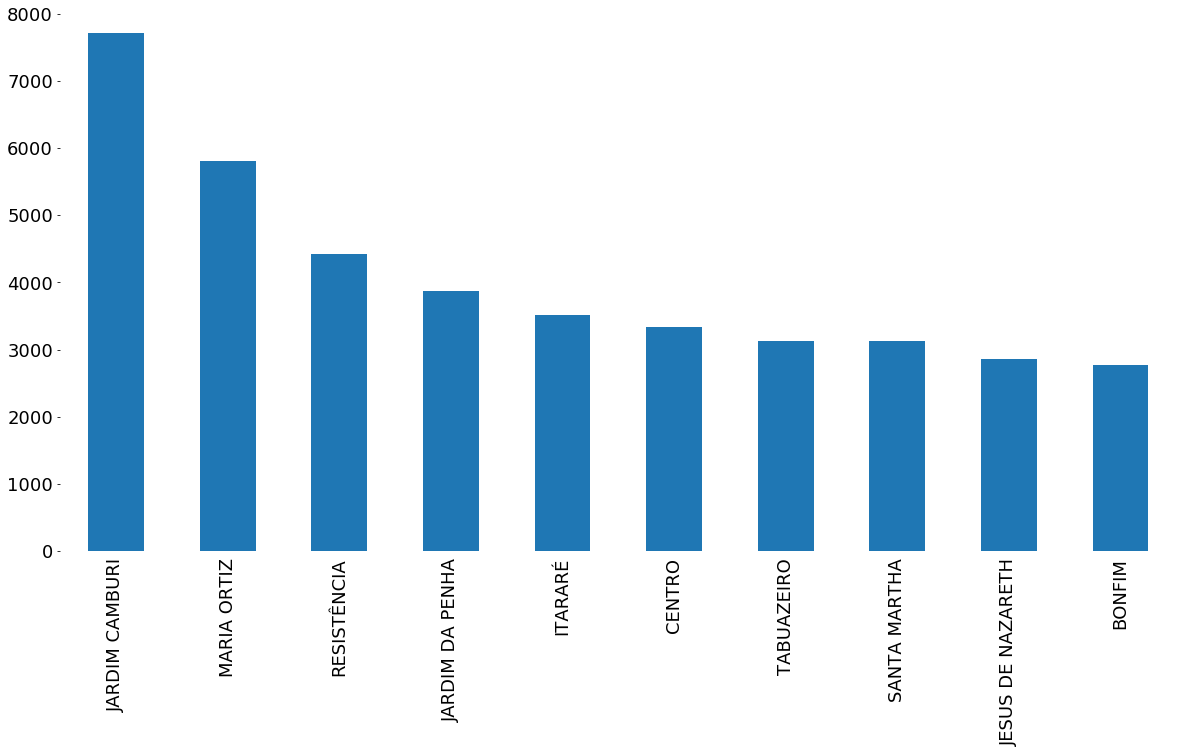

In [17]:
data['Neighbourhood'].value_counts(sort=True).nlargest(10).plot.bar()

We can make a pie chart to better visualise the `Gender` column.

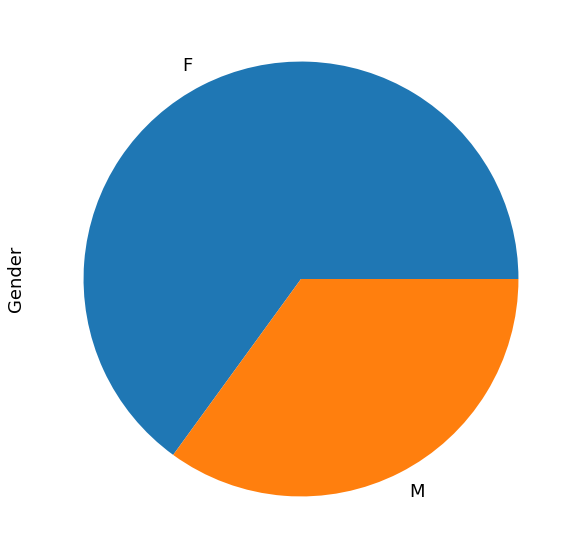

In [18]:
data['Gender'].value_counts().plot.pie()

# Conclusion

The `value_counts()` function is often one of my first starting points for data analysis as it enables me to very quickly plot trends and derive insights from individual columns in a data set. This article has given a quick overview of various types of analyses you can use this for but this function has more uses beyond the scope of this post.

# References

https://medium.com/m/signin?operation=login&redirect=https%3A%2F%2Ftowardsdatascience.com%2Fvaluable-data-analysis-with-pandas-value-counts-d87bbdf42f79